Predicted value for 2028: 18.52
Predicted value for 2032: 34.93


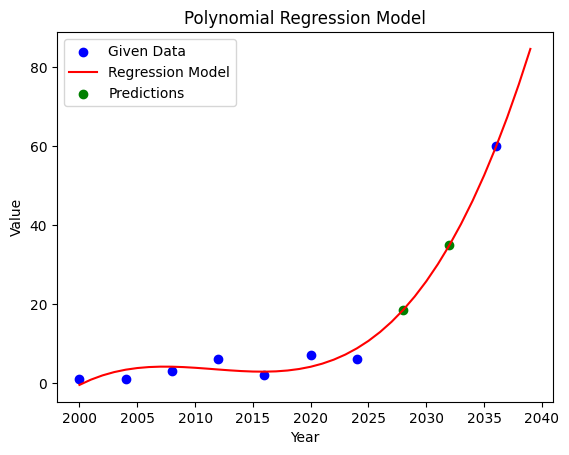

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Given data
data = {
    'Year': [2000, 2004, 2008, 2012, 2016, 2020, 2024, 2036],
    'Value': [1, 1, 3, 6, 2, 7, 6, 60]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Prepare the data
X = np.array(df['Year']).reshape(-1, 1)
y = np.array(df['Value'])

# Use polynomial regression for better fitting
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values for 2028 and 2032
future_years = np.array([2028, 2032]).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_values = model.predict(future_years_poly)

# Print predictions
for year, value in zip(future_years.flatten(), future_values):
    print(f"Predicted value for {year}: {value:.2f}")

# Plot the data and the model
plt.scatter(X, y, color='blue', label='Given Data')
plt.plot(np.arange(2000, 2040, 1), model.predict(poly.transform(np.arange(2000, 2040, 1).reshape(-1, 1))), color='red', label='Regression Model')
plt.scatter(future_years, future_values, color='green', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Polynomial Regression Model')
plt.legend()
plt.show()